In [13]:
import tensorflow_core as tf
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [42]:
x_dataset = np.linspace(-1, 1, 300)

y_train_coeffs = [0, 1, 2, 3, 4, 5, 6] # 6 degree
y_dataset = 5

for i in range(len(y_train_coeffs)):
    y_dataset += y_train_coeffs[i] * np.power(x_dataset, i)

y_dataset += np.random.randn(*x_dataset.shape) * 1.5 # add noise

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

x_test += np.random.randn(*x_test.shape) * 0.5 # add noise
y_test += np.random.randn(*y_test.shape) * 0.5 # add noise

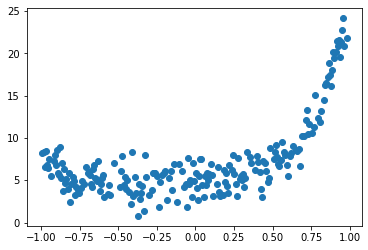

In [43]:
# plot train data
plt.scatter(x_train, y_train)
plt.show()

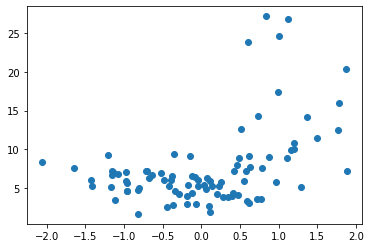

In [44]:
# plot test data
plt.scatter(x_test, y_test)
plt.show()

In [45]:
def model(X, w):
    terms = []
    for i in range(len(y_train_coeffs)):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w = tf.Variable([0.] * len(y_train_coeffs), name="parameters")
y_model = model(X, w)

learning_rate = 0.01
training_epochs = 100

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [46]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
sess.close()

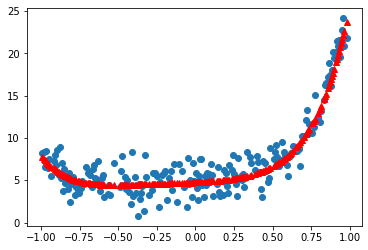

In [47]:
plt.scatter(x_train, y_train)

y_learned = 0
for i in range(len(y_train_coeffs)):
    y_learned += w_val[i] * np.power(x_train, i)

plt.plot(x_train, y_learned, "r^")
plt.show()

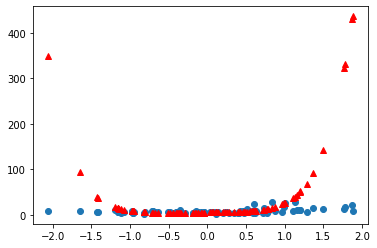

In [48]:
plt.scatter(x_test, y_test)

y_learned = 0
for i in range(len(y_train_coeffs)):
    y_learned += w_val[i] * np.power(x_test, i)

plt.plot(x_test, y_learned, "r^")
plt.show()

In [49]:
acceptableError = 8.0

def comparePrediction(y_feed, y_predict):
    if np.sqrt(np.square(y_feed - y_predict)) <= acceptableError:
        return True
    return False

In [50]:
acc_train = 0
for ind, x in enumerate(x_train):
    y_predict = 5
    for i in range(len(y_train_coeffs)):
        y_predict += w_val[i] * np.power(x, i)

    if comparePrediction(y_train[ind], y_predict):
        acc_train += 1

acc_train = acc_train / len(x_train) * 100

print(f"Accuracy on training dataset {acc_train}")
# print("Accuracy on testing dataset {}")

Accuracy on training dataset 98.57142857142858


In [51]:
acc_test = 0
for ind, x in enumerate(x_test):
    y_predict = 5
    for i in range(len(y_train_coeffs)):
        y_predict += w_val[i] * np.power(x, i)

    if comparePrediction(y_test[ind], y_predict):
        acc_test += 1

acc_test = acc_test / len(x_test) * 100

print(f"Accuracy on training dataset {acc_test}")
# print("Accuracy on testing dataset {}")

Accuracy on training dataset 63.33333333333333
